In [1]:
import numpy as np
import pyemma.plots as mplt
import matplotlib.pyplot as plt
# from msmbuilder.dataset import dataset
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

X = np.load('3_TAE_lat_lag_8_seed.npy')

In [3]:
def hist_raw_data(tics, Y):
    x_min, x_max, y_min, y_max = np.min(tics[:,0])-0.1, np.max(tics[:,0])+0.1, np.min(tics[:,1])-0.1, np.max(tics[:,1])+0.1
    
    # Number of 2D regions in which the plot is divided.
    x_resolution, y_resolution = 40, 40
    
    count = tics.shape[0]
    histogram = np.zeros([x_resolution, y_resolution])
    norm = np.zeros([x_resolution, y_resolution])
    x_interval_length = (x_max - x_min) / x_resolution
    y_interval_length = (y_max - y_min) / y_resolution
    #interval_surface = x_interval_length * y_interval_length
    #increment = 1000.0 / count / interval_surface
    
    for i in range(count):
        x = int((tics[i,:][0] - x_min) / x_interval_length)
        y = int((tics[i,:][1] - y_min) / y_interval_length)
        #print x, y
        norm[x,y] += 1
        histogram[x,y] += Y[i]
    
    histogram = np.divide(histogram, norm)
    return x_min, x_max, y_min, y_max, histogram

<ipython-input-3-b94ae8b6ab7b>:22: RuntimeWarning: invalid value encountered in true_divide
  histogram = np.divide(histogram, norm)


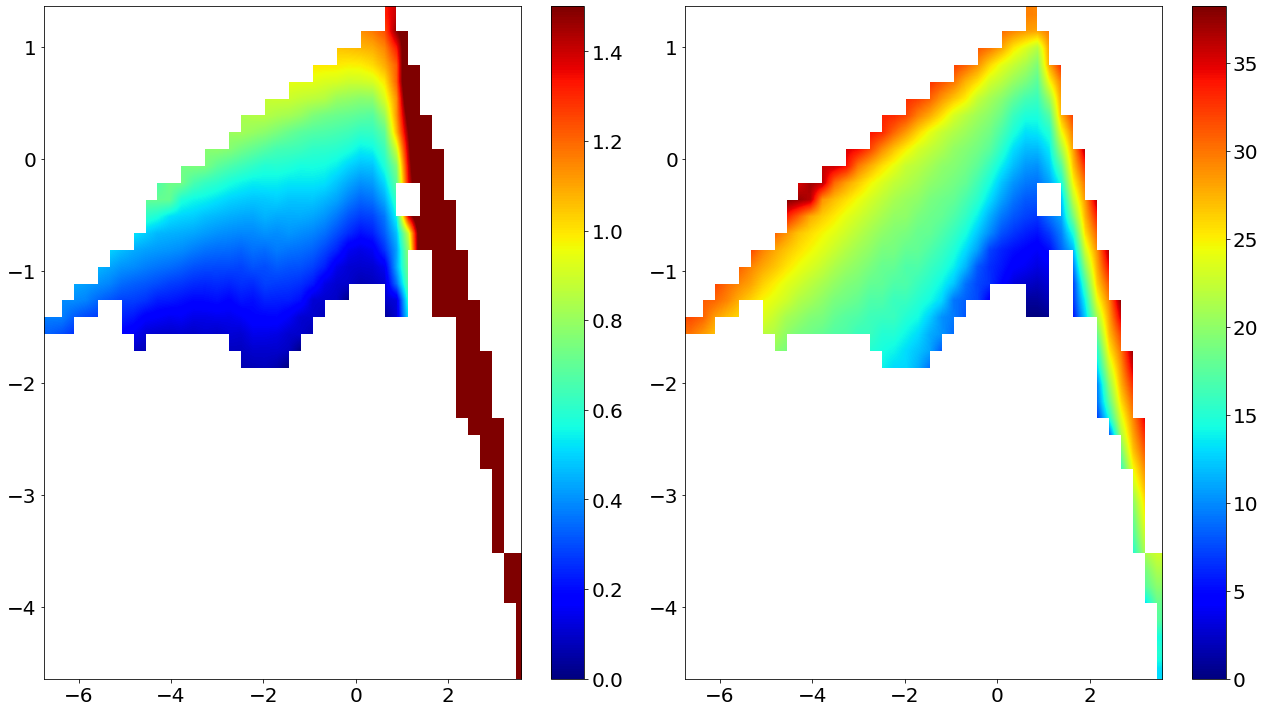

In [11]:
#ax = plt.subplot(1,3,1)
#mplt.plot_free_energy(X[:,0], X[:,1], vmin=0, vmax=9, cmap='jet', ax=ax, nbins=100)

f1 = np.load('Unscaled_data_sorted.npy')
f = np.vstack(f1)
y = f[:,0]
#y = np.load('../DATA_EXTENDED/RUN'+str(i)+'/nc.npy')
x_min, x_max, y_min, y_max, histogram = hist_raw_data(X, y)
histogram = histogram - np.min(histogram[~np.isnan(histogram)])
ax=plt.subplot(1,2,1)
ax.tick_params(axis='both',labelsize=20)
plt.imshow(histogram.T, origin='lower', extent=[x_min, x_max, y_min, y_max],interpolation='bilinear', aspect='auto', cmap=plt.cm.jet)
cbar= plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.clim(0,1.5)

y = f[:,1]    
x_min, x_max, y_min, y_max, histogram = hist_raw_data(X, y)
histogram = histogram - np.min(histogram[~np.isnan(histogram)])
ax=plt.subplot(1,2,2)
ax.tick_params(axis='both',labelsize=20)
plt.imshow(histogram.T, origin='lower', extent=[x_min, x_max, y_min, y_max], aspect='auto',interpolation='bilinear', cmap=plt.cm.jet)
cbar= plt.colorbar()
cbar.ax.tick_params(labelsize=20)


plt.tight_layout()
plt.savefig('40_overlay_raw_data_(0,1.5).png', dpi=300)
#plt.savefig('tae_plot_new.png')
plt.show()


<Figure size 1296x720 with 0 Axes>